<a href="https://colab.research.google.com/github/cderekw4224/dataMeetUpPyForecasting/blob/master/Meetup_TimeSeries_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is time series data?

- Data with time (e.g., minutes, hours, day, month, year) information
- Popular in marketing, finance, economics, education, etc.
- Understanding the past and forecasting the future
- Examples (e.g., predicting student enrollment, predicting economic indicators)

# Install Python Packages

- To collect time-series data from the web

Install pandas-datareader http://pandas-datareader.readthedocs.org/en/latest/

In [1]:
!pip install pandas-datareader

In [0]:
import pandas as pd
import numpy as np

from pandas_datareader import data, wb
import datetime

from sklearn import linear_model
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import RepeatedKFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Get Time-Series Data from the web

- Time-series data is everywhere!

http://pandas-datareader.readthedocs.org/en/latest/

http://pandas.pydata.org/pandas-docs/stable/remote_data.html

Functions from pandas.io.data and pandas.io.ga extract data from various Internet sources into a DataFrame. Currently the following sources are supported:

* Yahoo! Finance
* Google Finance
* St.Louis FED (FRED)
* Kenneth French’s data library
* World Bank
* Google Analytics

It should be noted, that various sources support different kinds of data, so not all sources implement the same methods and the data elements returned might also differ.

In [0]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2015, 5, 27)

#SPY: Summary for SPDR S&P 500- Yahoo! Finance
df = data.DataReader("SPY", 'yahoo', start, end)

In [0]:
print(df.head())
print(df.tail())

                  High         Low        Open       Close       Volume  \
Date                                                                      
2010-01-04  113.389999  111.510002  112.370003  113.330002  118944600.0   
2010-01-05  113.680000  112.849998  113.260002  113.629997  111579900.0   
2010-01-06  113.989998  113.430000  113.519997  113.709999  116074400.0   
2010-01-07  114.330002  113.180000  113.500000  114.190002  131091100.0   
2010-01-08  114.620003  113.660004  113.889999  114.570000  126402800.0   

            Adj Close  
Date                   
2010-01-04  94.130867  
2010-01-05  94.380074  
2010-01-06  94.446495  
2010-01-07  94.845207  
2010-01-08  95.160805  
                  High         Low        Open       Close       Volume  \
Date                                                                      
2015-05-21  213.750000  212.509995  212.710007  213.500000   64764600.0   
2015-05-22  213.539993  212.910004  213.039993  212.990005   57433500.0   
2015-0

In [0]:
print(df.index)

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2015-05-14', '2015-05-15', '2015-05-18', '2015-05-19',
               '2015-05-20', '2015-05-21', '2015-05-22', '2015-05-26',
               '2015-05-27', '2015-05-28'],
              dtype='datetime64[ns]', name='Date', length=1359, freq=None)


In [0]:
print(df.index.values)

['2010-01-04T00:00:00.000000000' '2010-01-05T00:00:00.000000000'
 '2010-01-06T00:00:00.000000000' ... '2015-05-26T00:00:00.000000000'
 '2015-05-27T00:00:00.000000000' '2015-05-28T00:00:00.000000000']


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1359 entries, 2010-01-04 to 2015-05-28
Data columns (total 6 columns):
High         1359 non-null float64
Low          1359 non-null float64
Open         1359 non-null float64
Close        1359 non-null float64
Volume       1359 non-null float64
Adj Close    1359 non-null float64
dtypes: float64(6)
memory usage: 74.3 KB


In [0]:
# summary statistics accross the whole DataFrame
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1359.000000,1359.000000,1359.000000,1359.000000,1.359000e+03,1359.000000
mean,152.637196,151.039139,151.870368,151.907506,1.571199e+08,133.937824
std,32.275346,32.290878,32.269864,32.281570,8.057946e+07,32.706163
min,103.419998,101.129997,103.110001,102.199997,4.296340e+07,85.641502
25%,126.355000,125.005001,125.735001,125.764999,1.034368e+08,107.636269
50%,141.830002,140.369995,141.179993,141.259995,1.391727e+08,123.531578
75%,183.409996,181.765007,182.689995,182.839996,1.905006e+08,164.864220
max,213.779999,212.910004,213.240005,213.500000,7.178287e+08,197.146927


In [0]:
# Closing price for most recent 5 trading days
df[['Close']].tail()

,Close
Date,
2015-05-21,213.500000
2015-05-22,212.990005
2015-05-26,210.699997
2015-05-27,212.699997
2015-05-28,212.460007


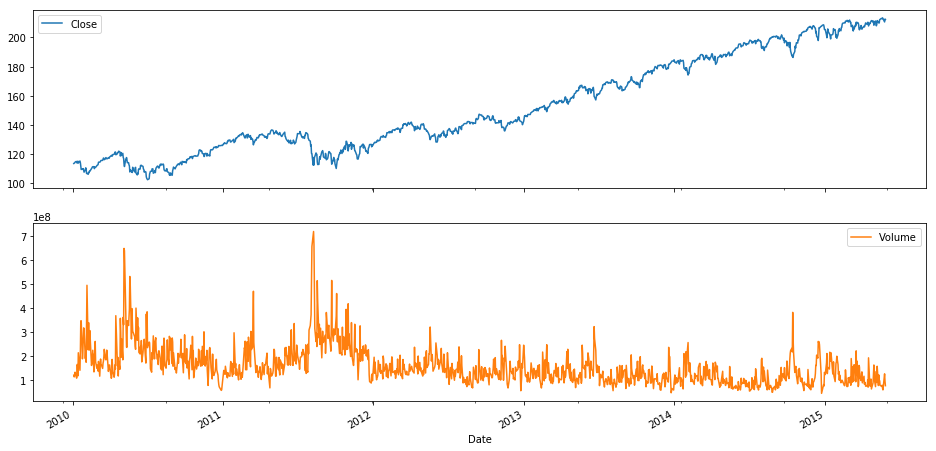

In [0]:
# plot the historical closing prices and volume using matplotlib
df[['Close', 'Volume']].plot(subplots=True, figsize=(16, 8));

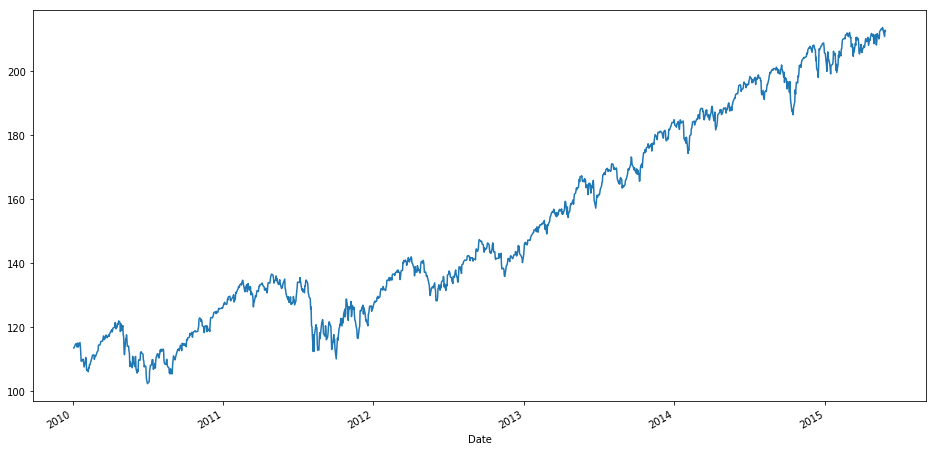

In [0]:
df['Close'].plot(figsize=(16,8));

In [0]:
# find the higest closing price
df.sort_values(['Close'], ascending=False)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-05-21,213.750000,212.509995,212.710007,213.500000,64764600.0,197.146927
2015-05-18,213.399994,212.160004,212.240005,213.100006,72785600.0,196.777573
2015-05-19,213.570007,212.690002,213.240005,213.029999,72114600.0,196.712906
2015-05-22,213.539993,212.910004,213.039993,212.990005,57433500.0,196.675980
2015-05-20,213.779999,212.500000,213.149994,212.880005,76857500.0,196.574402
2015-05-27,212.979996,210.759995,211.250000,212.699997,93214000.0,196.408203
2015-05-28,212.589996,211.630005,212.330002,212.460007,74974600.0,196.186539
2015-05-15,212.610001,211.860001,212.440002,212.440002,76510100.0,196.168091
2015-05-14,212.320007,210.910004,211.240005,212.210007,95934000.0,195.955719


In [0]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,94.130867
1,2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,94.380074
2,2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,94.446495
3,2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,94.845207
4,2010-01-08,114.620003,113.660004,113.889999,114.570000,126402800.0,95.160805


# Moving average

= "the unweighted mean of the previous n data ...  An example of a simple equally weighted running mean for a n-day sample of closing price is the mean of the previous n days' closing prices. If those prices are p_M, p_{M-1},\dots,p_{M-(n-1)} then the formula is"

http://en.wikipedia.org/wiki/Moving_average)

For example, you want to use a 3-day moving average method. Then, the average of the first 3 days (Day1, Day2, Day3) becomes the prediction of Day 3.
<img src="http://static.chandoo.org/img/n/calculate-moving-average.png">

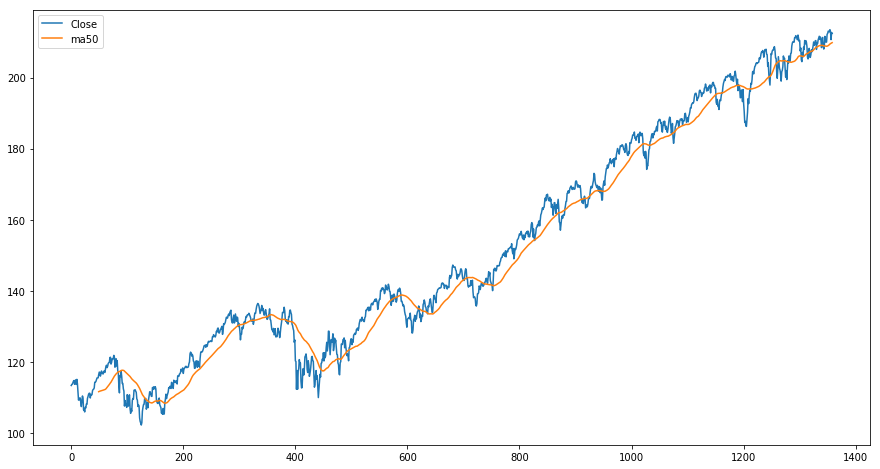

In [0]:
# chart a basic 50 period moving average of the closing price

df['ma50'] = df['Close'].rolling(50).mean()
plots = df[['Close', 'ma50']].plot(figsize=(15, 8))

# Regression analysis

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 8 columns):
Date         1359 non-null datetime64[ns]
High         1359 non-null float64
Low          1359 non-null float64
Open         1359 non-null float64
Close        1359 non-null float64
Volume       1359 non-null float64
Adj Close    1359 non-null float64
ma50         1310 non-null float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 85.0 KB


In [0]:
df['Time'] = range(1, 1+len(df))
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,ma50,Time
0,2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,94.130867,NaN,1
1,2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,94.380074,NaN,2
2,2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,94.446495,NaN,3
3,2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,94.845207,NaN,4
4,2010-01-08,114.620003,113.660004,113.889999,114.570000,126402800.0,95.160805,NaN,5


In [0]:
#univariate linear regression ... predicting Y value with one X variable
#in this example, Closing price is Y value and Time is considered a X variable

X = df["Time"][:, np.newaxis]
y = df["Close"]

In [0]:
#Time is the X variable 

X[:5]

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [0]:
#without split validation
lr = linear_model.LinearRegression()

lr.fit(X, y)

lr.predict(X)

array([ 98.0852643 ,  98.16453123,  98.24379815, ..., 205.57121297,
       205.65047989, 205.72974682])

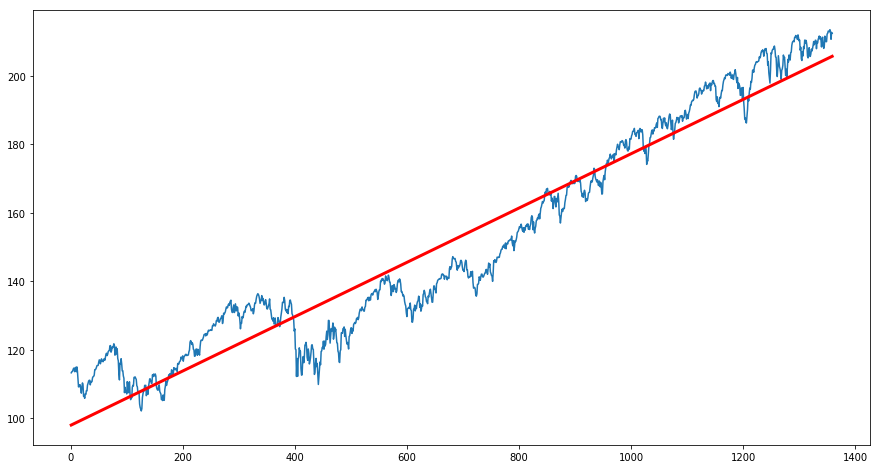

In [0]:
plt.figure(figsize=(15,8))
plt.plot(X, y)
plt.plot(X, lr.predict(X), color='red', linewidth=3)

In [0]:
# The coefficients
print("Coefficients ", lr.coef_)
print("y-intercept ", lr.intercept_)

# The mean square error
print(("Residual sum of squares: %.2f"
      % np.mean((lr.predict(X) - y) ** 2)))
# Explained variance score: 1 is perfect prediction
print(('Variance score: %.2f' % lr.score(X, y)))

Coefficients  [0.07926692]
y-intercept  98.0059973782914
Residual sum of squares: 74.30
Variance score: 0.93


You can use the following **linear equation to predict the future**

**Y = 0.079245X + 98.015931**

```Note```: This model is NOT for predicting the future ... this shows just a trend in the data ... since the data is **autocorrelated** meaning that t-1 predicts t.

In [0]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,ma50,Time
0,2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,94.130867,NaN,1
1,2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,94.380074,NaN,2
2,2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,94.446495,NaN,3
3,2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,94.845207,NaN,4
4,2010-01-08,114.620003,113.660004,113.889999,114.570000,126402800.0,95.160805,NaN,5


In [0]:
df['Close-1'] = df['Close'].shift(-1) 

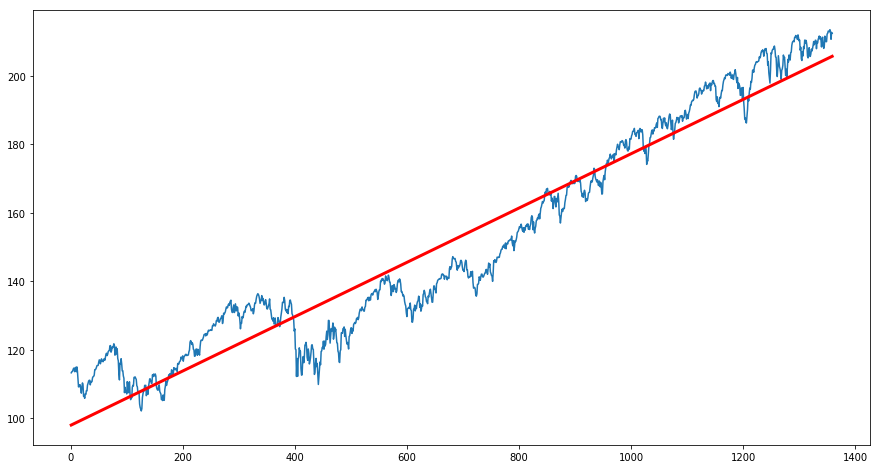

In [0]:
plt.figure(figsize=(15,8))
plt.plot(X, y)
plt.plot(X, lr.predict(X), color='red', linewidth=3)

In [0]:
df1 = df[['Time', 'Close']]
df1.head()

,Time,Close
0,1,113.330002
1,2,113.629997
2,3,113.709999
3,4,114.190002
4,5,114.570000


In [0]:
# split into train and test sets
#df = df.astype('float32')
values = df1.values
print(values.shape)

n_train_hours = 1000
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, 1:], train[:, :1]
test_X, test_y = test[:, 1:], test[:, :1]

# reshape input to be 3D [samples, timesteps, features]
#train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1359, 2)
(1000, 1) (1000, 1) (359, 1) (359, 1)


In [0]:
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model.fit(train_X, train_y)
y_pred = rf_model.predict(test_X)
rf_model_accuracy = mean_absolute_error(test_y, y_pred)
rf_model_accuracy

C:\Anaconda\envs\py36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


182.40175487465183

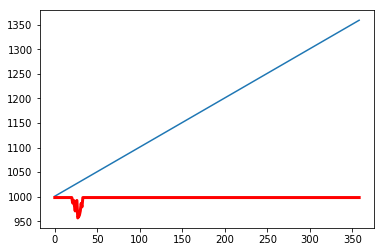

In [0]:
plt.plot(test_y)
plt.plot(y_pred, color='red', linewidth=3)
plt.show()

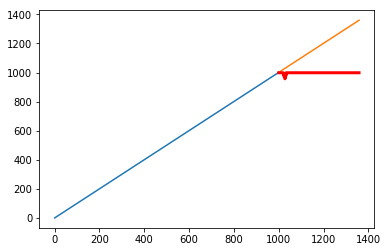

In [0]:
plt.plot(train_y)
plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in y_pred], color='red', linewidth=3)
plt.show()